In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy.polynomial.polynomial as poly
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

### 1. Show the first 5 rows of the dataset

In [2]:
df = pd.read_csv('./e-customers.csv')
df.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### 2. Show the description and the info on the dataset, using appropriate Pandas functions

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
# set up some manageable variables

asl = df['Avg. Session Length']
ta = df['Time on App']
tw = df['Time on Website']
lom = df['Length of Membership']

yas = df['Yearly Amount Spent']
evs = df[['Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership']]

### 3. Use seaborn jointplot function to see which fields correlate well with the "Yearly Amount Spent" column. Write your findings.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


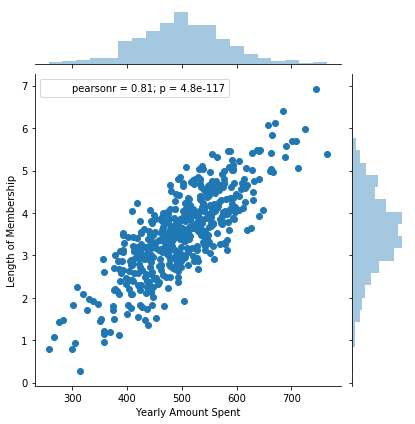

In [6]:
sns.jointplot(yas, lom)

#### Length of Membership = Positive Correlation of 0.81, great fit

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


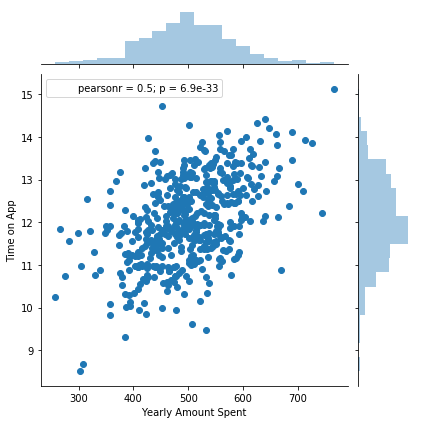

In [7]:
sns.jointplot(yas, ta)

#### Time on App = Positive correlation of 0.5, good fit

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


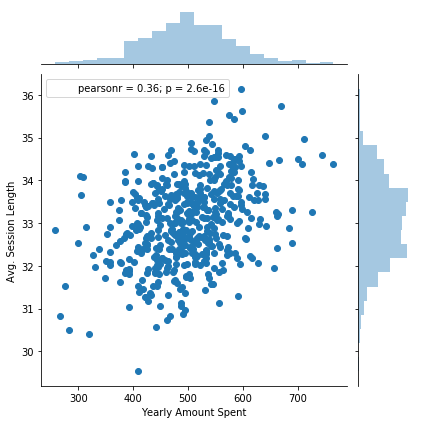

In [8]:
sns.jointplot(yas, asl)

#### Ave. Session Length = Positive correlation of 0.36, okay fit

In [ ]:
sns.jointplot(yas, tw)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


#### Time on Website = Negative correlation of -.0026, bad fit

### 4. Make a summary plot of feature relationships using pairplot function of Seaborn

In [ ]:
sns.pairplot(df)

### 5. Create two dataframes: one for the target variable ("Yearly Amount Spent"), the other - containing all the rest of numerical features

In [ ]:
# set up some manageable variables

asl = df['Avg. Session Length']
ta = df['Time on App']
tw = df['Time on Website']
lom = df['Length of Membership']

yas = df['Yearly Amount Spent']
evs = df[['Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership']]

### 6. Split the data into a training and test sets. Make a test set size 0.3 and random seed 123 (so the results are consistent for all students)

In [ ]:
X_full = yas
Y_full = evs

X_train, X_test, Y_train, Y_test = train_test_split(X_full, Y_full, test_size=0.3, random_state=123)

### 7&8. Fit a regression model on the training set
#### Print out the coefficients of the model

In [ ]:
plt.plot(X_train, Y_train, ".", markersize=5)
plt.title("Train set")

In [ ]:
X_full = yas
Y_full = lom

X_train, X_test, Y_train, Y_test = train_test_split(X_full, Y_full, test_size=0.3, random_state=123)

In [ ]:
coefs_lin_lom = poly.polyfit(X_train, Y_train, 1)
coefs_sqr_lom = poly.polyfit(X_train, Y_train, 2)
coefs_cube_lom = poly.polyfit(X_train, Y_train, 3)

In [ ]:
X_line = np.linspace(min(X_train - 10), max(X_train + 10), 200, True)

ffit_lin = poly.polyval(X_line, coefs_lin_lom)
ffit_sqr = poly.polyval(X_line, coefs_sqr_lom)
ffit_cube = poly.polyval(X_line, coefs_cube_lom)

In [ ]:
plt.ylim(min(Y_train - 5), max(Y_train + 5))

plt.plot(X_line, ffit_lin, "g")
plt.plot(X_line, ffit_sqr, "k")
plt.plot(X_line, ffit_cube, "b")


plt.plot(X_train, Y_train, "r.", markersize=5)
plt.show()
print('Linear Coeff = ', coefs_lin_lom)

In [ ]:
X_full = yas
Y_full = ta

X_train, X_test, Y_train, Y_test = train_test_split(X_full, Y_full, test_size=0.3, random_state=123)

coefs_lin_ta = poly.polyfit(X_train, Y_train, 1)
coefs_sqr_ta = poly.polyfit(X_train, Y_train, 2)
coefs_cube_ta = poly.polyfit(X_train, Y_train, 3)

X_line = np.linspace(min(X_train - 10), max(X_train + 10), 200, True)

ffit_lin = poly.polyval(X_line, coefs_lin_ta)
ffit_sqr = poly.polyval(X_line, coefs_sqr_ta)
ffit_cube = poly.polyval(X_line, coefs_cube_ta)

plt.ylim(min(Y_train - 5), max(Y_train + 5))

plt.plot(X_line, ffit_lin, "g")
plt.plot(X_line, ffit_sqr, "k")
plt.plot(X_line, ffit_cube, "b")


plt.plot(X_train, Y_train, "r.", markersize=5)
plt.show()
print('Linear Coeff = ', coefs_lin_ta)

In [ ]:
X_full = yas
Y_full = asl

X_train, X_test, Y_train, Y_test = train_test_split(X_full, Y_full, test_size=0.3, random_state=123)

coefs_lin_asl = poly.polyfit(X_train, Y_train, 1)
coefs_sqr_asl = poly.polyfit(X_train, Y_train, 2)
coefs_cube_asl = poly.polyfit(X_train, Y_train, 3)

X_line = np.linspace(min(X_train - 10), max(X_train + 10), 200, True)

ffit_lin = poly.polyval(X_line, coefs_lin_asl)
ffit_sqr = poly.polyval(X_line, coefs_sqr_asl)
ffit_cube = poly.polyval(X_line, coefs_cube_asl)

plt.ylim(min(Y_train - 5), max(Y_train + 5))

plt.plot(X_line, ffit_lin, "g")
plt.plot(X_line, ffit_sqr, "k")
plt.plot(X_line, ffit_cube, "b")


plt.plot(X_train, Y_train, "r.", markersize=5)
plt.show()
print('Linear Coeff = ', coefs_lin_asl)

In [ ]:
X_full = yas
Y_full = tw

X_train, X_test, Y_train, Y_test = train_test_split(X_full, Y_full, test_size=0.3, random_state=123)

coefs_lin_tw = poly.polyfit(X_train, Y_train, 1)
coefs_sqr_tw = poly.polyfit(X_train, Y_train, 2)
coefs_cube_tw = poly.polyfit(X_train, Y_train, 3)

X_line = np.linspace(min(X_train - 10), max(X_train + 10), 200, True)

ffit_lin = poly.polyval(X_line, coefs_lin_tw)
ffit_sqr = poly.polyval(X_line, coefs_sqr_tw)
ffit_cube = poly.polyval(X_line, coefs_cube_tw)

plt.ylim(min(Y_train - 5), max(Y_train + 5))

plt.plot(X_line, ffit_lin, "g")
plt.plot(X_line, ffit_sqr, "k")
plt.plot(X_line, ffit_cube, "b")


plt.plot(X_train, Y_train, "r.", markersize=5)
plt.show()
print('Linear Coeff = ', coefs_lin_tw)

### 9. Make a prediction of the target variable from features dataframe

#### Target variable is Length of Membership, most strongly correlated to Yearly Amount Spent. Fostering loyalty in customers is key to the success of this business

### 10. Calculate the Mean Average Error (using sklearn.metrics module)

In [ ]:
mse_lin_lom = mean_squared_error(Y_test, poly.polyval(X_test, coefs_lin_lom))
print("MSE for linear Length of Membership regressor: ", mse_lin_lom)
mse_lin_ta = mean_squared_error(Y_test, poly.polyval(X_test, coefs_lin_ta))
print("MSE for a linear Time On App regressor: ", mse_lin_ta)
mse_lin_asl = mean_squared_error(Y_test, poly.polyval(X_test, coefs_lin_asl))
print("MSE for a linear Avg. Session Length regressor: ", mse_lin_asl)
mse_lin_tw = mean_squared_error(Y_test, poly.polyval(X_test, coefs_lin_tw))
print("MSE for a linear Time On Website regressor: ", mse_lin_tw)

In [ ]:
mse_sqr_lom = mean_squared_error(Y_test, poly.polyval(X_test, coefs_sqr_lom))
print("MSE for quadratic Length of Membership regressor: ", mse_sqr_lom)
mse_sqr_ta = mean_squared_error(Y_test, poly.polyval(X_test, coefs_sqr_ta))
print("MSE for a quadratic Time On App regressor: ", mse_sqr_ta)
mse_sqr_asl = mean_squared_error(Y_test, poly.polyval(X_test, coefs_sqr_asl))
print("MSE for a quadratic Avg. Session Length regressor: ", mse_sqr_asl)
mse_sqr_tw = mean_squared_error(Y_test, poly.polyval(X_test, coefs_sqr_tw))
print("MSE for a quadratic Time On Website regressor: ", mse_sqr_tw)

In [ ]:
# print(coefs_cube_tw)

mse_cube_lom = mean_squared_error(Y_test, poly.polyval(X_test, coefs_cube_lom))
print("MSE for cubed Length of Membership regressor: ", mse_cube_lom)
mse_cube_ta = mean_squared_error(Y_test, poly.polyval(X_test, coefs_cube_ta))
print("MSE for a cubed Time On App regressor: ", mse_cube_ta)
mse_cube_asl = mean_squared_error(Y_test, poly.polyval(X_test, coefs_cube_asl))
print("MSE for a cubed Avg. Session Length regressor: ", mse_cube_asl)
mse_cube_tw = mean_squared_error(Y_test, poly.polyval(X_test, coefs_cube_tw))
print("MSE for a cubed Time On Website regressor: ", mse_cube_tw)

### 11. Using Seaborn distplot show the histogram of the residuals - differences between the target variable and predicted target variable

In [ ]:
sns.distplot(yas)

### 12. Answer the main question: How should we allocate the engineering budget between website development and app development?
#### Hint: look at the regression coefficients and contemplate their meaning

#### Given the negative correlation of website use to sales, initial thoughts are engineering can probably allocate the majority of its resources to app development. However, it could be the app has already been optimized and the website was neglected. Average users are using the website for almost 3x use as the app, meaning important decisions are being formed but the user experience might not promote purchase behavior. I recommend a qualitative deep dive in to the underlying consumer sentiment causing the observed website vs. app behaviors. If forced into a decision, focus resources on improving website UX in an effort to improve conversion rates.